In [73]:
# Imports
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skspatial.objects import Line, Points, Plane

In [74]:
def open_line(file_name):
    '''
    Opens one of the text files and parses the line into a skspatial object
    '''
    
    with open(file_name) as f:
        lines = f.readlines()

    point = [float(dim) for dim in lines[0].split()[1:]]
    line = [float(dim) for dim in lines[1].split()[1:]]
    
    return Line(point, line)

In [75]:
def open_carbon_atoms(file_name):    

    with open(file_name) as pdb_structure:
        lines = pdb_structure.readlines()

    first_segment = list()
    second_segment = list()
    third_segment = list()
    fourth_segment = list()

    allCA_7EJ1 = list()

    for line in lines:
        line = line[:22] + ' ' + line[22:] # correct .pdb stupidity        

        if len(line.split()) > 5:
            residue_num = int(line.split()[5])
            chain = line.split()[4]
        else:
            continue

        if 'CA' in line:
            x = float(line.split()[6])
            y = float(line.split()[7])
            z = float(line.split()[8])
            data = [x,y,z]
            allCA_7EJ1.append(data)

        if 455 <= residue_num <= 488 and ('CA' in line):
                
            x = float(line.split()[6])
            y = float(line.split()[7])
            z = float(line.split()[8])
            data = (x,y,z)
            if (chain == 'B'):
                first_segment.append(data)
            elif chain == 'D':
                second_segment.append(data)
            elif chain == 'F':
                third_segment.append(data)
            elif chain == 'H':
                fourth_segment.append(data)    

    return np.array(allCA_7EJ1)

In [76]:
# Open line and carbon atoms for 6V01

# Show Mark problem with 6V01
line = open_line("line_7EJ1.txt")
points = open_carbon_atoms("../DATA/ALIGNED/KCN/7EJ1.pdb")

In [112]:
# Generate planes
# Tbh, I totally accidently erased the instructions we agreed on yesterday, so this is what I have from memory

origin = [0, 0, 0]
origin_projection = line.project_point(origin)
perpendicular_line = Line(origin_projection, origin - origin_projection)
normal_vector = perpendicular_line.vector.cross(line.vector)
first_plane = Plane(origin_projection, normal_vector)
second_plane = Plane(origin_projection, line.vector.cross(normal_vector))

C:\Users\Jack Kellerk\AppData\Local\Temp\ipykernel_27696\4124062173.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


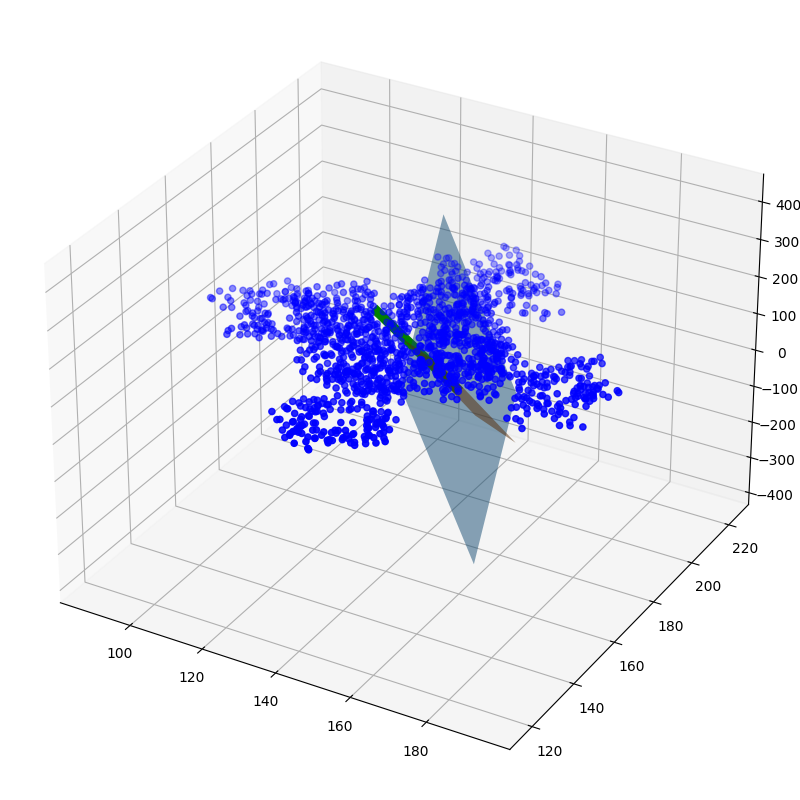

In [114]:
# View results

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

line.plot_3d(ax, -100, 100, linewidth = 7, c = 'g')
first_plane.plot_3d(ax, lims_x = (-10, 10), lims_y = (-10, 10), alpha = 0.5)
second_plane.plot_3d(ax, lims_x = (-10, 10), lims_y = (-10, 10), alpha = 0.5)
ax.scatter(points[:,0], points[:,1], points[:,2], c = 'b', marker = 'o')
ax.set_label(['x','y','z'])
plt.show()

In [120]:
# Determine what quadrant points are in
quadrant_1, quadrant_2, quadrant_3, quadrant_4 = [], [], [], []

for atom in points:    
    if line.distance_point(atom) < 10:
        if first_plane.side_point(atom) < 0 and second_plane.side_point(atom) > 0:
            quadrant_1.append(atom)
        elif first_plane.side_point(atom) > 0 and second_plane.side_point(atom) > 0:
            quadrant_2.append(atom)
        elif first_plane.side_point(atom) > 0 and second_plane.side_point(atom) < 0:
            quadrant_3.append(atom)
        elif first_plane.side_point(atom) < 0 and second_plane.side_point(atom) < 0:
            quadrant_4.append(atom)

quadrant_1, quadrant_2, quadrant_3, quadrant_4 = np.array(quadrant_1), np.array(quadrant_2), np.array(quadrant_3), np.array(quadrant_4)

In [131]:
# The shapes of the quadrants are the same, as expected.

for index, quadrant in enumerate([quadrant_1, quadrant_2, quadrant_3, quadrant_4]):
    print("Quadrant " + str(index) + ": " + str(quadrant.shape))

Quadrant 0: (27, 3)
Quadrant 1: (27, 3)
Quadrant 2: (27, 3)
Quadrant 3: (27, 3)


In [134]:
# These are features from the channel
max_radius = 0
min_radius = float("inf")
avg_radius = 0

# For each quadrant, find the atom closest to the line. 
# Using the four atoms identified, calculate the channel's average radius length, maximum radius length, and minimum radius length.
for quadrant in [quadrant_1, quadrant_2, quadrant_3, quadrant_4]:
    
    smallest_radius = float("inf")

    for atom in quadrant:
        if line.distance_point(atom) < smallest_radius:
            smallest_radius = line.distance_point(atom)
    
    avg_radius += smallest_radius

    if max_radius < smallest_radius:
        max_radius = smallest_radius
    
    if smallest_radius < min_radius:
        min_radius = smallest_radius

avg_radius = avg_radius / 4

In [135]:
# Interestingly, these values are not the same

max_radius, min_radius, avg_radius

(3.9965477003455168, 3.9809585609977245, 3.9870895312832295)